### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Take 1000 walkers and let them walk for 200 steps:
 [[-1 -1 1 ... -1 -1 1]
 [-1 1 1 ... 1 1 -1]
 [1 -1 1 ... -1 -1 -1]
 ...
 [1 1 1 ... -1 -1 1]
 [1 -1 1 ... 1 -1 -1]
 [1 1 -1 ... 1 1 1]] 

the actual walking distances for each walker:
 [[-1 -2 -1 ... 26 25 26]
 [-1 0 1 ... -4 -3 -4]
 [1 0 1 ... 40 39 38]
 ...
 [1 2 3 ... -6 -7 -6]
 [1 0 1 ... -4 -5 -6]
 [1 2 1 ... 10 11 12]] 

 the square of that 2D array:
 [[1 4 1 ... 676 625 676]
 [1 0 1 ... 16 9 16]
 [1 0 1 ... 1600 1521 1444]
 ...
 [1 4 9 ... 36 49 36]
 [1 0 1 ... 16 25 36]
 [1 4 1 ... 100 121 144]] 

the mean of the squared distances at each step:
 [1.0 1.964 2.888 3.852 4.648 5.484 6.392 7.6 8.488 9.38 10.136 10.64
 11.592 12.468 13.472 14.224 15.368 16.556 17.696 18.568 19.592 20.548
 22.2 23.896 25.136 26.18 26.856 28.144 29.16 29.92 31.192 31.588 32.32
 32.736 33.928 35.124 35.728 36.844 37.92 38.572 39.96 40.808 42.04 42.912
 44.776 45.536 46.52 47.556 48.464 49.016 49.64 49.936 50.576 51.396
 52.144 53.16 54.376 55.024 55.9

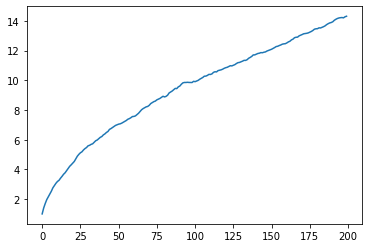

In [24]:
import numpy as np
import matplotlib.pyplot as plt

walkers = np.empty(shape = (1000,200), dtype = "object")
for i in range(1000):
    for j in range(200):
        walkers[i][j] = np.random.choice([-1,1])
print("Take 1000 walkers and let them walk for 200 steps:\n",walkers,"\n")

sum_t = walkers.cumsum(axis=1)
print("the actual walking distances for each walker:\n",sum_t,"\n")  

sum_t_2 = sum_t **2
print(" the square of that 2D array:\n",sum_t_2,"\n")

m = sum_t_2.mean(axis=0)
print("the mean of the squared distances at each step:\n",m,"\n")

plt.plot([i for i in range(200)], (m)**(1/2))


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [25]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2021-12-14 22:03:32--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2021-12-14 22:03:33--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b8b4047503496dca3549d566c.dl.dropboxusercontent.com/cd/0/inline/Bb2bWgJ7HduXRTxs4GZ-gjp_4UBYWNCEbohv2ijtaflOQDAmm5R8Bp4TsrnFrhZxS6opi36Kr7H7l_e9IOO0fQOfSYOXoUr5Hj1L0R9EsHiKUjvEUdMPI8437MWyU0dxa1zDRb71xY-Zpt5nPpO9QUEr/file# [following]
--2021-12-14 22:03:34--  https://uc0b8b4047503496dca3549d566c.dl.dropboxusercontent.com/cd/0/inline/Bb2bWgJ7HduXRTxs4GZ-gjp_4UBYWNCEbohv2ijtaflOQDAmm5R8Bp4TsrnFrhZxS6opi36Kr7H7l_

In [29]:
file = np.loadtxt('populations.txt.1', dtype='float', skiprows=1)
file

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

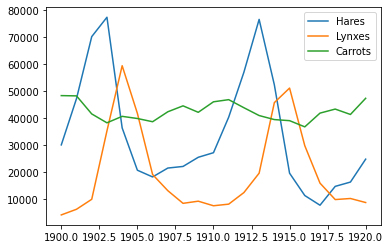

In [38]:
year = file[:,0]
hares = file[:,1]
lynxes = file[:,2]
carrots = file[:,3]

plt.plot(year,hares)
plt.plot(year,lynxes)
plt.plot(year,carrots)
plt.legend(["Hares","Lynxes","Carrots"])
   

In [44]:
means = []
stds = []
for i in range(4):
    means.append(np.average(file[:,i]))
    stds.append(np.std(file[:,i]))
print("means:",means,"\n")
print("stds:",stds,"\n")

print("correlate(hares, carrots):",np.correlate(hares, carrots))
print("correlate(carrots, lynxes):",np.correlate(carrots, lynxes))
print("correlate(hares, lynxes):",np.correlate(hares, lynxes))

means: [1910.0, 34080.95238095238, 20166.666666666668, 42400.0] 

stds: [6.0553007081949835, 20897.906458089667, 16254.591536908763, 3322.5062255844787] 

correlate(hares, carrots): [3.032147e+10]
correlate(carrots, lynxes): [1.718454e+10]
correlate(hares, lynxes): [1.494612e+10]


In [58]:
a=["hares", "lynxes", "carrots"]

for i in range(len(file)):
    print("the highest population in ",file[i,0],"is:",a[file[i,1:].argmax()],"with",file[i,1:].max(),"\n")


the highest population in  1900.0 is: carrots with 48300.0 

the highest population in  1901.0 is: carrots with 48200.0 

the highest population in  1902.0 is: hares with 70200.0 

the highest population in  1903.0 is: hares with 77400.0 

the highest population in  1904.0 is: lynxes with 59400.0 

the highest population in  1905.0 is: lynxes with 41700.0 

the highest population in  1906.0 is: carrots with 38600.0 

the highest population in  1907.0 is: carrots with 42300.0 

the highest population in  1908.0 is: carrots with 44500.0 

the highest population in  1909.0 is: carrots with 42100.0 

the highest population in  1910.0 is: carrots with 46000.0 

the highest population in  1911.0 is: carrots with 46800.0 

the highest population in  1912.0 is: hares with 57000.0 

the highest population in  1913.0 is: hares with 76600.0 

the highest population in  1914.0 is: hares with 52300.0 

the highest population in  1915.0 is: lynxes with 51100.0 

the highest population in  1916.0 is:

In [60]:
#they have same bihaviour but have delay. when each 
#one increase others will increase but with delay.